# Deutsch algorithm

***

In [1]:
# Qiskit itself.
import qiskit
# Aer provider, simulator.
import qiskit.providers.aer as aer

In [2]:
# Plotting.
import matplotlib.pyplot as plt
# Change the style.
plt.style.use('ggplot')

<br>

## $f(x) = 0$

***

$\begin{array}{cccc}
  x & y & f(x) & y \oplus f(x) & y\\
  \hline                      
   0  &  0  &   0    &       0 & 0\\
   0  &  1  &   0    &       1 & 1\\
   1  &  0  &   0    &       0 & 0\\
   1  &  1  &   0    &       1 & 1\\
\end{array}$

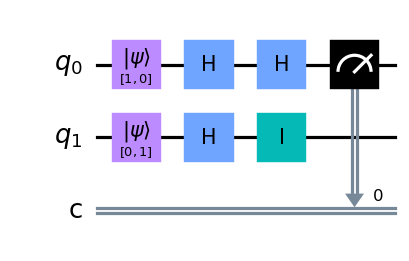

In [3]:
# Create a circuit with two qubits and one classical bit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialize qubits to 0 and 1.
circuit.initialize([1, 0], 0)
circuit.initialize([0, 1], 1)

# Apply Hadamard to both qubits.
circuit.h((0, 1))

# U_f is just the identity on y, based on f(x)=0.
circuit.i(1)

# Hadamard on x.
circuit.h(0)

# Measure x.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.6)

### Simulate

***

{'0': 1000}


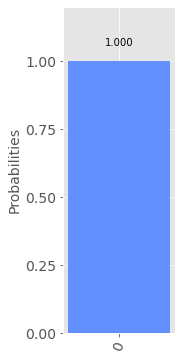

In [4]:
# Create simulation.
simulator = aer.QasmSimulator()

# Compile the circuit for the simulator.
compiled_circuit = qiskit.transpile(circuit, simulator)

# Run the simulated circuit 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get the 1000 results.
result = job.result()

# Get the counts.
counts = result.get_counts(circuit)

# Print the counts.
print(counts)

# Plot histogram of counts.
qiskit.visualization.plot_histogram(counts, figsize=(2,6))

<br>

## $f(x) = 1$

***


$\begin{array}{cccc}
  x & y & f(x) & y \oplus f(x) & \neg y\\
  \hline                      
   0  &  0  &   1    &       1 & 1\\
   0  &  1  &   1    &       0 & 0\\
   1  &  0  &   1    &       1 & 1\\
   1  &  1  &   1    &       0 & 0\\
\end{array}$


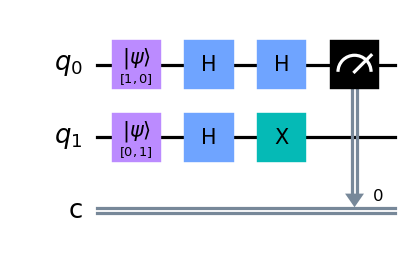

In [5]:
# Create a circuit with two qubits and one classical bit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialize qubits to 0 and 1.
circuit.initialize([1, 0], 0)
circuit.initialize([0, 1], 1)

# Apply Hadamard to both qubits.
circuit.h((0, 1))

# U_f is X gate on y, based on f(x)=1.
circuit.x(1)

# Hadamard on x.
circuit.h(0)

# Measure x.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.6)


### Simulate

***

{'0': 1000}


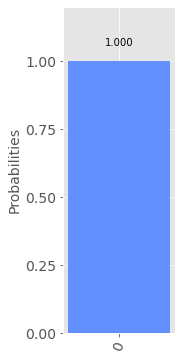

In [6]:
# Create simulation.
simulator = aer.QasmSimulator()

# Compile the circuit for the simulator.
compiled_circuit = qiskit.transpile(circuit, simulator)

# Run the simulated circuit 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get the 1000 results.
result = job.result()

# Get the counts.
counts = result.get_counts(circuit)

# Print the counts.
print(counts)

# Plot histogram of counts.
qiskit.visualization.plot_histogram(counts, figsize=(2,6))

<br>

## $f(0) = 0, f(1) = 1$

***


$\begin{array}{cccc}
  x & y & f(x) & y \oplus f(x) & x \oplus y\\
  \hline                      
   0  &  0  &   0    &       0 & 0\\
   0  &  1  &   0    &       1 & 1\\
   1  &  0  &   1    &       1 & 1\\
   1  &  1  &   1    &       0 & 0\\
\end{array}$

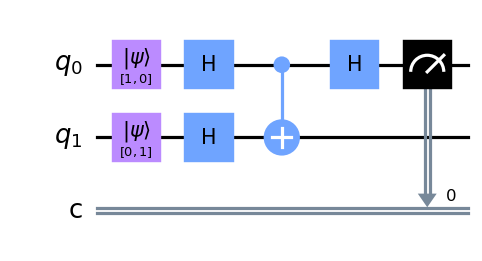

In [7]:
# Create a circuit with two qubits and one classical bit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialize qubits to 0 and 1.
circuit.initialize([1, 0], 0)
circuit.initialize([0, 1], 1)

# Apply Hadamard to both qubits.
circuit.h((0, 1))

# U_f is CNOT on y by x.
circuit.cnot(0, 1)

# Hadamard on x.
circuit.h(0)

# Measure x.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.6)


### Simulate

***

{'1': 1000}


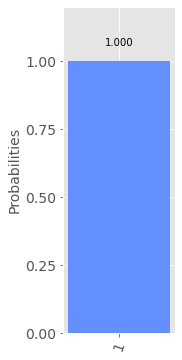

In [8]:
# Create simulation.
simulator = aer.QasmSimulator()

# Compile the circuit for the simulator.
compiled_circuit = qiskit.transpile(circuit, simulator)

# Run the simulated circuit 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get the 1000 results.
result = job.result()

# Get the counts.
counts = result.get_counts(circuit)

# Print the counts.
print(counts)

# Plot histogram of counts.
qiskit.visualization.plot_histogram(counts, figsize=(2,6))

<br>

## $f(0) = 1, f(1) = 0$


***

$\begin{array}{cccc}
  x & y & f(x) & y \oplus f(x) & \neg(x \oplus y) \\
  \hline                      
   0  &  0  &   1    &       1 & 0\\
   0  &  1  &   1    &       0 & 1\\
   1  &  0  &   0    &       0 & 1\\
   1  &  1  &   0    &       1 & 0\\
\end{array}$

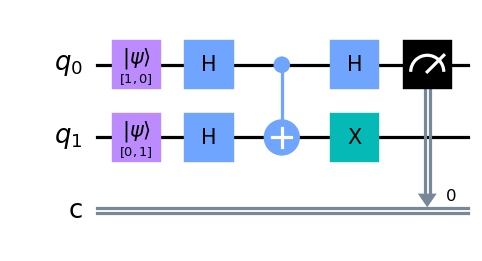

In [9]:
# Create a circuit with two qubits and one classical bit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialize qubits to 0 and 1.
circuit.initialize([1, 0], 0)
circuit.initialize([0, 1], 1)

# Apply Hadamard to both qubits.
circuit.h((0, 1))

# U_f is CNOT on y by x and then an X on 1.
circuit.cnot(0, 1)
circuit.x(1)

# Hadamard on x.
circuit.h(0)

# Measure x.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.6)

{'1': 1000}


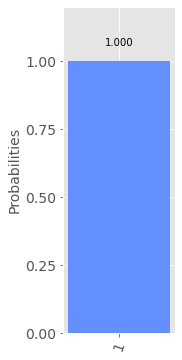

In [10]:
# Create simulation.
simulator = aer.QasmSimulator()

# Compile the circuit for the simulator.
compiled_circuit = qiskit.transpile(circuit, simulator)

# Run the simulated circuit 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get the 1000 results.
result = job.result()

# Get the counts.
counts = result.get_counts(circuit)

# Print the counts.
print(counts)

# Plot histogram of counts.
qiskit.visualization.plot_histogram(counts, figsize=(2,6))

<br>

## Why it works

***

$
A = 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\otimes
\begin{bmatrix}
0 \\
1
\end{bmatrix}
=
\begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}
$

$
B = 
H \otimes H =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
=
\frac{1}{2}
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1
\end{bmatrix}
$


$
C = 
H \otimes I =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}
$

$
B \times A
=
\frac{1}{2}
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}
=
\frac{1}{2}
\begin{bmatrix}
1 \\
-1 \\
1 \\
-1
\end{bmatrix}
$


<br>

#### Constant function

***

$
f(x) = 0 \Rightarrow 00 \rightarrow 00, 01 \rightarrow 01, 10 \rightarrow 10, 11 \rightarrow 11
\Rightarrow
U_f \times B \times A
=
\frac{1}{2}
\begin{bmatrix}
1 \\
-1 \\
1 \\
-1
\end{bmatrix}
$

$
C \times U_f \times B \times A =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}
\frac{1}{2}
\begin{bmatrix}
1 \\
-1 \\
1 \\
-1
\end{bmatrix}
= 
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
2 \\
-2 \\
0 \\
0
\end{bmatrix}
= 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
-1 \\
0 \\
0
\end{bmatrix}
$

***

$
f(x) = 1 \Rightarrow 00 \rightarrow 01, 01 \rightarrow 00, 10 \rightarrow 11, 11 \rightarrow 10
\Rightarrow
U_f \times B \times A
=
\frac{1}{2}
\begin{bmatrix}
-1 \\
1 \\
- 1\\
1
\end{bmatrix}
$

$
C \times U_f \times B \times A =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}
\frac{1}{2}
\begin{bmatrix}
-1 \\
1 \\
-1 \\
1
\end{bmatrix}
= 
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
-2 \\
2 \\
0 \\
0
\end{bmatrix}
= 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
-1 \\
1 \\
0 \\
0
\end{bmatrix}
$

<br>

#### Balanced function

***

$
f(0) = 0, f(1) = 1 \Rightarrow 00 \rightarrow 00, 01 \rightarrow 01, 10 \rightarrow 11, 11 \rightarrow 10
\Rightarrow
U_f \times B \times A
=
\frac{1}{2}
\begin{bmatrix}
1 \\ 
-1 \\
-1 \\
1
\end{bmatrix}
$


$
f(0) = 1, f(1) = 0 \Rightarrow 00 \rightarrow 01, 01 \rightarrow 00, 10 \rightarrow 10, 11 \rightarrow 11
\Rightarrow
U_f \times B \times A
=
\frac{1}{2}
\begin{bmatrix}
1 \\
-1 \\
- 1\\
1
\end{bmatrix}
$

$
C \times U_f \times B \times A =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}
\frac{1}{2}
\begin{bmatrix}
1 \\
-1 \\
-1 \\
1
\end{bmatrix}
= 
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
0 \\
0 \\
2 \\
-2
\end{bmatrix}
= 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
0 \\
0 \\
1 \\
-1
\end{bmatrix}
$

***

## End